In [70]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [71]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_03_43_a_path = images_dir+"Fig0343(a)(skeleton_orig).pgm"
print(fig_03_43_a_path)

fig_03_43_a_analyzer = Image_analyzer(fig_03_43_a_path)

fig_03_43_a_analyzer.mypgmread()

/Users/fuad/Documents/coding/image_processing_tutorials/005_frequency_domain_filtering/images/Fig0343(a)(skeleton_orig).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/005_frequency_domain_filtering/images/Fig0343(a)(skeleton_orig).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 500,
 800,
 255)

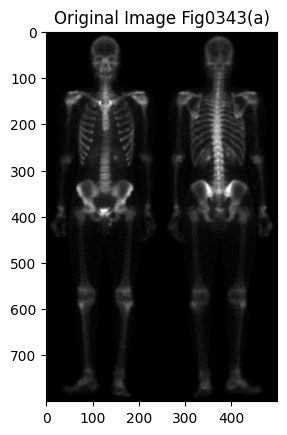

In [72]:
plt.figure()
plt.title("Original Image Fig0343(a)")
plt.imshow(fig_03_43_a_analyzer.image_array, cmap='gray')

In [73]:
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

fig_03_43_b_time_domain = fig_03_43_a_analyzer.myImageCorrelation(laplacian_kernel)



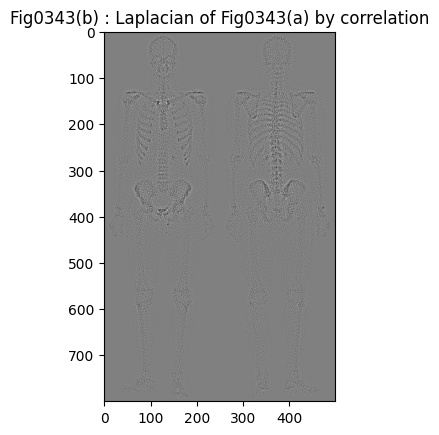

In [74]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by correlation")
plt.imshow(fig_03_43_b_time_domain, cmap='gray')

In [75]:
laplacian_kernel_size = laplacian_kernel.shape
print(laplacian_kernel_size)
fig_03_43_a_size = fig_03_43_a_analyzer.image_array.shape
print(fig_03_43_a_size)



(3, 3)
(800, 500)


In [76]:
print(laplacian_kernel)

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


In [77]:
print(laplacian_kernel[0])

[1 1 1]


In [78]:
fig_03_43_a_fourier = fig_03_43_a_analyzer.my2Dfft(m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                   n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)

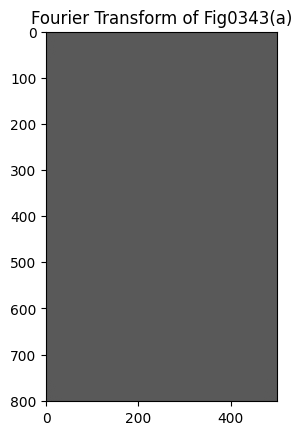

In [79]:
plt.figure()
plt.title("Fourier Transform of Fig0343(a)")
plt.imshow(np.real(fig_03_43_a_fourier), cmap='gray')

In [80]:
laplacian_kernel_fourier = Image_analyzer().my2Dfft(    image_array= laplacian_kernel,
                                                            m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)


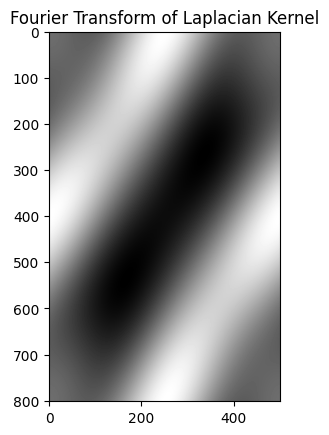

In [81]:
plt.figure()
plt.title("Fourier Transform of Laplacian Kernel")
plt.imshow(np.real(laplacian_kernel_fourier), cmap='gray')


In [82]:
fig_03_43_b_fourier_domain = fig_03_43_a_fourier * laplacian_kernel_fourier

fig_03_43_b_inverse_fourier = Image_analyzer().my2Difft(fig_03_43_b_fourier_domain)

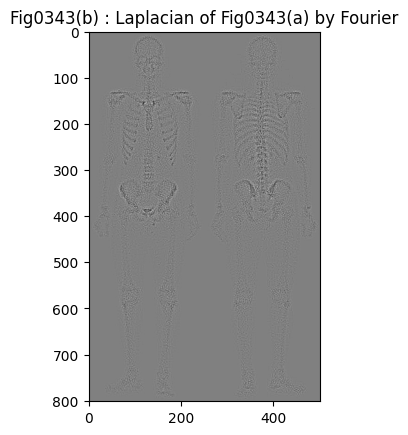

In [83]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by Fourier")
plt.imshow(np.real(fig_03_43_b_inverse_fourier), cmap='gray')


In [84]:
fig_03_43_c_time_domain = fig_03_43_a_analyzer.image_array - fig_03_43_b_time_domain


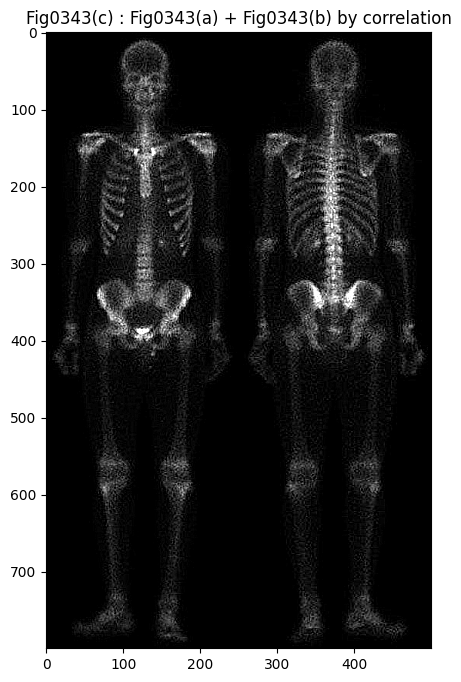

In [85]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(c) : Fig0343(a) + Fig0343(b) by correlation")
plt.imshow(fig_03_43_c_time_domain, cmap='gray', vmin=0, vmax=255)
plt.show()

In [86]:
fig_03_43_c_fourier_domain = fig_03_43_a_fourier + fig_03_43_b_fourier_domain
fig_03_43_c_inverse_fourier = Image_analyzer().my2Difft(fig_03_43_c_fourier_domain)

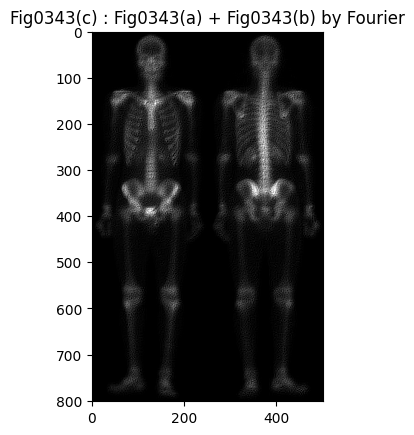

In [87]:
plt.figure()
plt.title("Fig0343(c) : Fig0343(a) + Fig0343(b) by Fourier")
plt.imshow(np.real(fig_03_43_c_inverse_fourier), cmap='gray', vmin=0, vmax=255)
plt.show()

In [88]:
sobel_x_kernel = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
sobel_y_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

fig_03_43_a_sobel_x_time_domain = fig_03_43_a_analyzer.myImageCorrelation(sobel_x_kernel)
fig_03_43_a_sobel_y_time_domain = fig_03_43_a_analyzer.myImageCorrelation(sobel_y_kernel)


In [89]:
fig_03_43_d_time_domain = np.abs(fig_03_43_a_sobel_x_time_domain)+ np.abs(fig_03_43_a_sobel_y_time_domain )


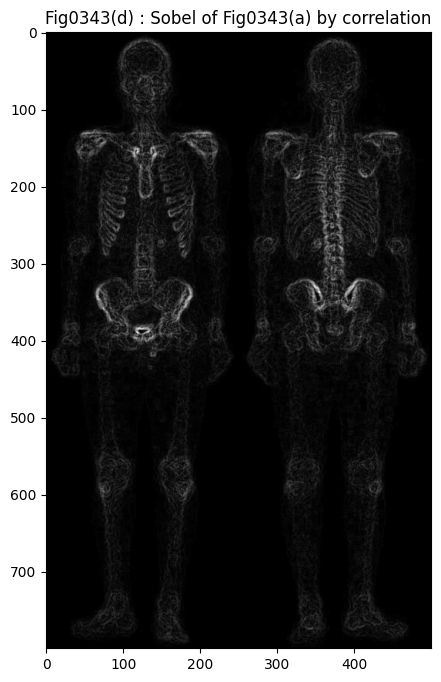

In [90]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(d) : Sobel of Fig0343(a) by correlation")
plt.imshow(fig_03_43_d_time_domain, cmap='gray' )
plt.show()

In [91]:
sobel_x_kernel_size = sobel_x_kernel.shape
sobel_y_kernel_size = sobel_y_kernel.shape
sobel_x_kernel_fourier = Image_analyzer().my2Dfft(    image_array= sobel_x_kernel,
                                                            m_point=sobel_x_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=sobel_x_kernel_size[1] + fig_03_43_a_size[1] - 1)
sobel_y_kernel_fourier = Image_analyzer().my2Dfft(    image_array= sobel_y_kernel,
                                                            m_point=sobel_y_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=sobel_y_kernel_size[1] + fig_03_43_a_size[1] - 1)


In [92]:
fig_03_43_a_sobel_x_fourier_domain = fig_03_43_a_fourier * sobel_x_kernel_fourier
fig_03_43_a_sobel_y_fourier_domain = fig_03_43_a_fourier * sobel_y_kernel_fourier

fig_03_43_a_sobel_x_inverse_fourier = np.real(Image_analyzer().my2Difft(fig_03_43_a_sobel_x_fourier_domain))
fig_03_43_a_sobel_y_inverse_fourier = np.real(Image_analyzer().my2Difft(fig_03_43_a_sobel_y_fourier_domain))

fig_03_43_d_inverse_fourier = np.abs(fig_03_43_a_sobel_x_inverse_fourier) + np.abs(fig_03_43_a_sobel_y_inverse_fourier)

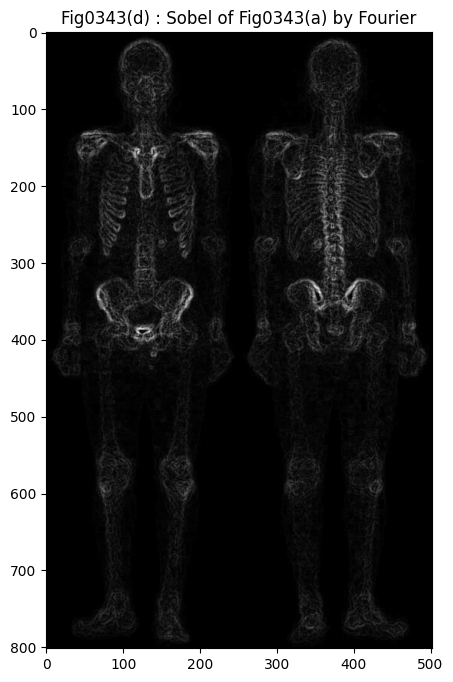

In [93]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(d) : Sobel of Fig0343(a) by Fourier")
plt.imshow(fig_03_43_d_inverse_fourier, cmap='gray')
plt.show()

In [94]:
average_kernel_5x5 = np.ones((5, 5)) / 25
fig_03_43_d_time_domain_analyzer = Image_analyzer()
fig_03_43_d_time_domain_analyzer.image_array = fig_03_43_d_time_domain
fig_03_43_d_time_domain_analyzer.set_image_height(fig_03_43_d_time_domain.shape[0])
fig_03_43_d_time_domain_analyzer.set_image_width(fig_03_43_d_time_domain.shape[1])
fig_03_43_e_time_domain = fig_03_43_d_time_domain_analyzer.myImageCorrelation(average_kernel_5x5)


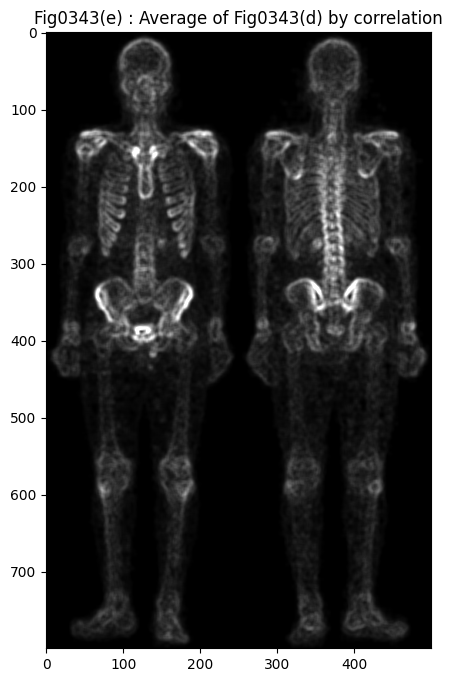

In [95]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(e) : Average of Fig0343(d) by correlation")
plt.imshow(fig_03_43_e_time_domain, cmap='gray', vmin=0, vmax=255)
plt.show()

In [96]:

fig_03_43_c_fourier_domain_analyzer = Image_analyzer()
fig_03_43_c_fourier_domain_analyzer.image_array = fig_03_43_c_inverse_fourier
fig_03_43_c_fourier_domain_analyzer.set_image_height(fig_03_43_c_inverse_fourier.shape[0])
fig_03_43_c_fourier_domain_analyzer.set_image_width(fig_03_43_c_inverse_fourier.shape[1])
average_kernel_5x5_fourier = fig_03_43_c_fourier_domain_analyzer.my2Dfft(    image_array= average_kernel_5x5,
                                                            m_point=average_kernel_5x5.shape[0] + fig_03_43_c_inverse_fourier.shape[0] - 1,
                                                            n_point=average_kernel_5x5.shape[1] + fig_03_43_c_inverse_fourier.shape[1] - 1)
fig_03_43_c_fourier_domain_for_average = fig_03_43_c_fourier_domain_analyzer.my2Dfft(    image_array= fig_03_43_c_inverse_fourier,
                                                            m_point=average_kernel_5x5.shape[0] + fig_03_43_c_inverse_fourier.shape[0] - 1,
                                                            n_point=average_kernel_5x5.shape[1] + fig_03_43_c_inverse_fourier.shape[1] - 1)
fig_03_43_e_fourier_domain = fig_03_43_c_fourier_domain_for_average * average_kernel_5x5_fourier

fig_03_43_e_inverse_fourier_domain = Image_analyzer().my2Difft(fig_03_43_e_fourier_domain)

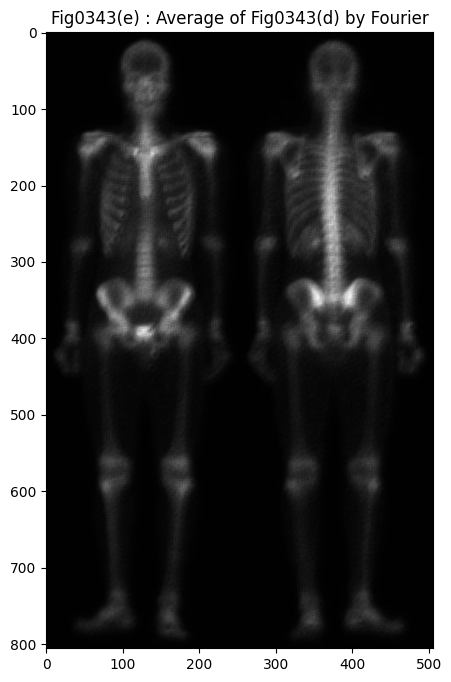

In [97]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(e) : Average of Fig0343(d) by Fourier")
plt.imshow(np.real(fig_03_43_e_inverse_fourier_domain), cmap='gray')
plt.show()

Average maskesinin fourier transformu alınıp fourier domaininde F.H işlemi yapılıp sonra tekrar inverse fourier yapıldığında çok iyi sonuç çıkmamaktadır. Zaman domaininde average masking yapmak daha iyi sonuç vermektedir.

In [98]:
mask_image_from_c_multiply_e_time_domain = Image_analyzer().image_array_scale( fig_03_43_c_time_domain * fig_03_43_e_time_domain)

In [99]:
print(np.max(mask_image_from_c_multiply_e_time_domain))

255


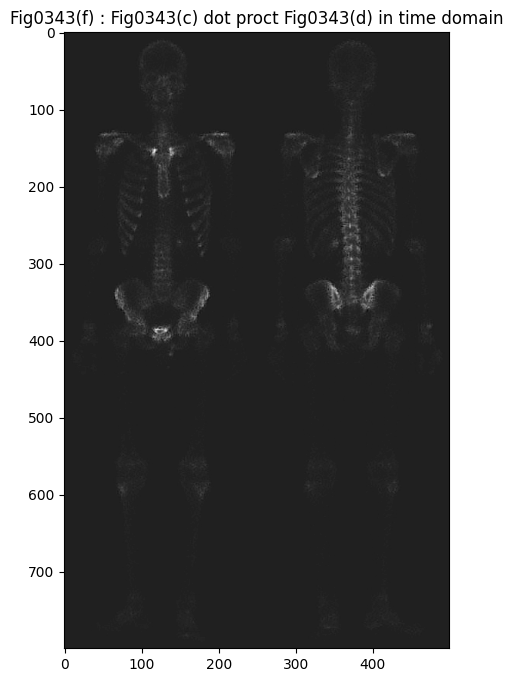

In [100]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(f) : Fig0343(c) dot proct Fig0343(d) in time domain")
plt.imshow(mask_image_from_c_multiply_e_time_domain, cmap='gray', vmin=0, vmax=255)
plt.show()

In [101]:
# (g) Sharpened image obtained by the sum of (a) and (f).
#mask = mask_image_from_c_multiply_e_time_domain > 0
#fig_03_43_g_time_domain = fig_03_43_a_analyzer.image_array  \
#                    + Image_analyzer().image_array_scale(mask_image_from_c_multiply_e_time_domain * mask)

In [102]:
fig_03_43_g_time_domain = Image_analyzer().image_array_scale(fig_03_43_a_analyzer.image_array + mask_image_from_c_multiply_e_time_domain)

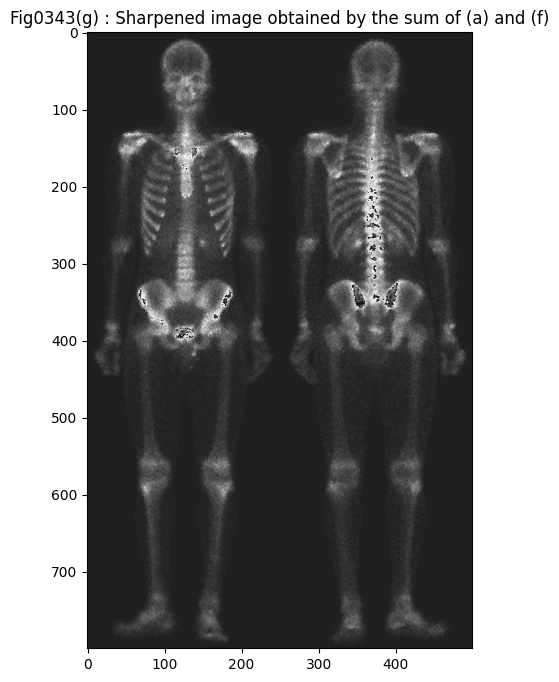

In [103]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(g) : Sharpened image obtained by the sum of (a) and (f)")
plt.imshow(Image_analyzer().image_array_scale(fig_03_43_g_time_domain), cmap='gray', vmin=0, vmax=255)
plt.show()

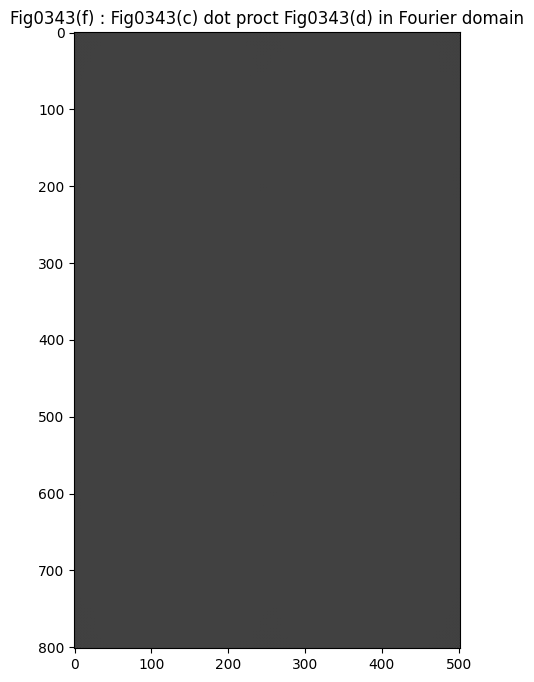

In [37]:
fig_03_43_c_fourier_domain_analyzer = Image_analyzer()
fig_03_43_c_fourier_domain_analyzer.image_array = fig_03_43_c_fourier_domain
fig_03_43_c_fourier_domain_analyzer.set_image_height(fig_03_43_c_fourier_domain.shape[0])
fig_03_43_c_fourier_domain_analyzer.set_image_width(fig_03_43_c_fourier_domain.shape[1])
#mask_image_from_c_multiply_e_fourier_domain = fig_03_43_c_fourier_domain_analyzer.myImageCorrelation(fig_03_43_e_fourier_domain)
# make it with opencv
import cv2
# Ensure the kernel is in the correct format for cv2.filter2D
fig_03_43_e_fourier_domain_real = np.abs(fig_03_43_e_fourier_domain)
mask_image_from_c_multiply_e_fourier_domain = cv2.filter2D(np.abs(fig_03_43_c_fourier_domain), -1, fig_03_43_e_fourier_domain_real, borderType=cv2.BORDER_CONSTANT)
mask_image_from_c_multiply_e_inverse_fourier = np.fft.ifft2(mask_image_from_c_multiply_e_fourier_domain)

plt.figure(figsize=(8, 8))

plt.title("Fig0343(f) : Fig0343(c) dot proct Fig0343(d) in Fourier domain")
plt.imshow(np.real(mask_image_from_c_multiply_e_inverse_fourier), cmap='gray')
plt.show()



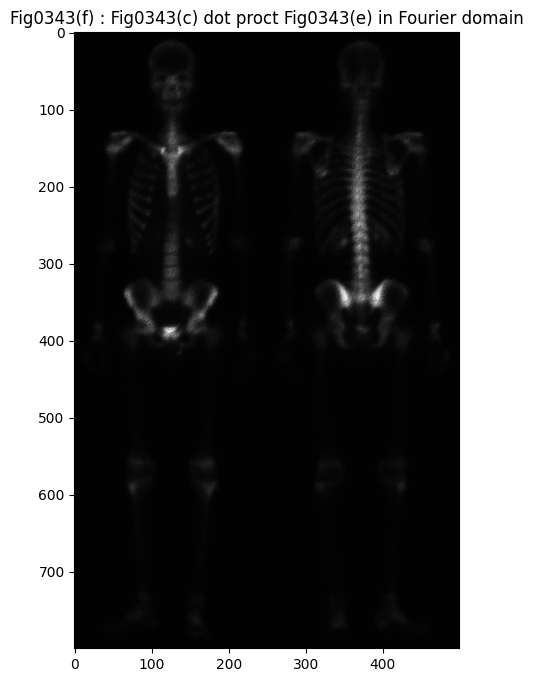

In [46]:
mask_image_from_c_multiply_e_time_domain_from_fourier = (fig_03_43_e_inverse_fourier_domain[3:803, 3:503]) * fig_03_43_c_inverse_fourier[1:801, 1:501]
plt.figure(figsize=(8, 8))
plt.title("Fig0343(f) : Fig0343(c) dot proct Fig0343(e) in Fourier domain")
plt.imshow(np.real(mask_image_from_c_multiply_e_time_domain_from_fourier), cmap='gray')
plt.show()

In [77]:
mask = mask_image_from_c_multiply_e_time_domain_from_fourier > 0
fig_03_43_g_time_domain_from_fourier = fig_03_43_a_analyzer.image_array  \
                    + Image_analyzer().image_array_scale(mask_image_from_c_multiply_e_time_domain_from_fourier * mask)
#fig_03_43_g_time_domain_from_fourier = mask_image_from_c_multiply_e_time_domain_from_fourier + fig_03_43_a_analyzer.image_array

/Users/fuad/Documents/coding/image_processing_tutorials/005_frequency_domain_filtering/image_analyzer.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  image_array = np.array(image_array, dtype=np.uint8)


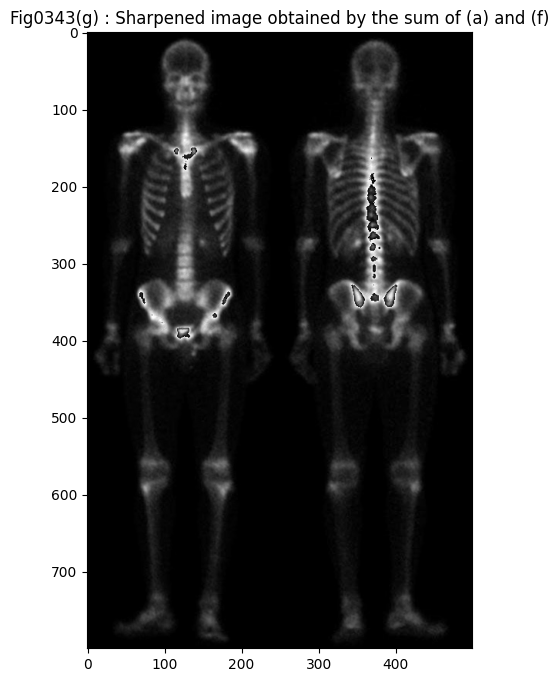

In [78]:

plt.figure(figsize=(8, 8))
plt.title("Fig0343(g) : Sharpened image obtained by the sum of (a) and (f)")
plt.imshow(np.abs(fig_03_43_g_time_domain_from_fourier), cmap='gray')

In [79]:
fig_03_43_g_time_domain_from_fourier_analyzer = Image_analyzer()
fig_03_43_g_time_domain_from_fourier_analyzer.image_array = fig_03_43_g_time_domain_from_fourier
fig_03_43_g_time_domain_from_fourier_analyzer.set_image_height(fig_03_43_g_time_domain_from_fourier.shape[0])
fig_03_43_g_time_domain_from_fourier_analyzer.set_image_width(fig_03_43_g_time_domain_from_fourier.shape[1])
fig_03_43_h_time_domain_from_fourier = fig_03_43_g_time_domain_from_fourier_analyzer.myImageGammaTransform(gamma = 0.5, c = 1)



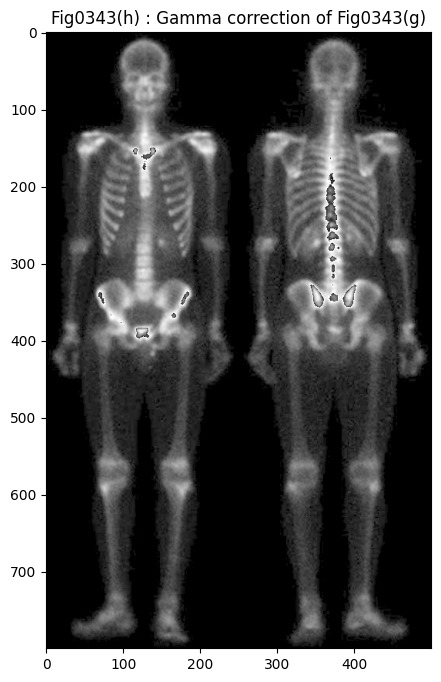

In [80]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(h) : Gamma correction of Fig0343(g)")
plt.imshow(np.real(fig_03_43_h_time_domain_from_fourier), cmap='gray')
plt.show()


# Try the same functions with numpy

In [42]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [43]:
#try to do the same things with numpy
fig_03_43_a_np = fig_03_43_a_analyzer.image_array
fig_03_43_b_np = np.zeros(fig_03_43_a_size)
fig_03_43_a_fourier_np = np.fft.fft2(fig_03_43_a_np, s = (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                           laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1))
laplacian_kernel__fourier_np = np.fft.fft2(laplacian_kernel, s = (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                              laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1))
fig_03_43_b_fourier_domain_np = fig_03_43_a_fourier_np * laplacian_kernel__fourier_np
fig_03_43_b_np = np.real(np.fft.ifft2(fig_03_43_b_fourier_domain_np , s = 
                                      (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                     laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)))


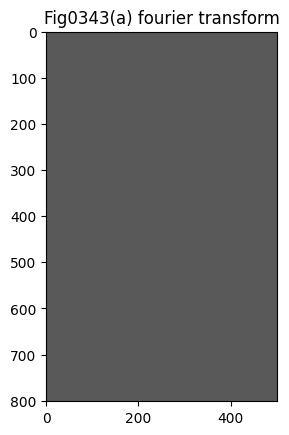

In [44]:
plt.figure()
plt.title("Fig0343(a) fourier transform")
plt.imshow(np.real(fig_03_43_a_fourier_np), cmap='gray')
plt.show()

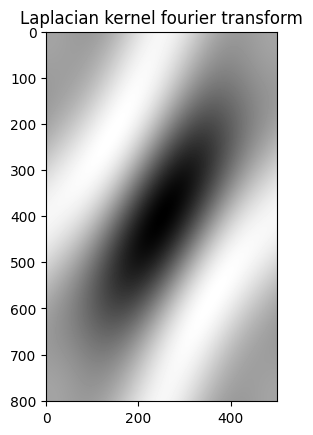

In [45]:
plt.figure()
plt.title("Laplacian kernel fourier transform")
plt.imshow(np.real(laplacian_kernel__fourier_np), cmap='gray')

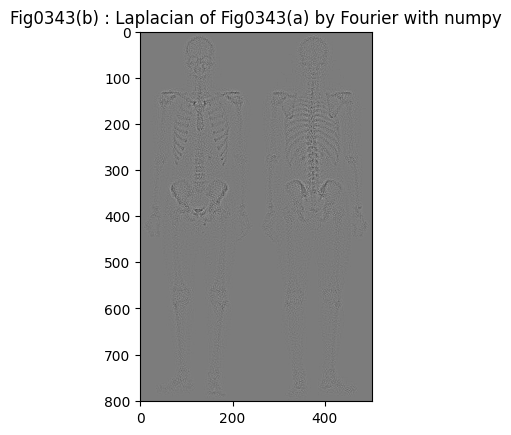

In [46]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by Fourier with numpy")
plt.imshow(fig_03_43_b_np, cmap='gray')

plt.show()

In [48]:
fig_03_43_c_fourier_domain_np = fig_03_43_a_fourier_np + fig_03_43_b_fourier_domain_np
fig_03_43_c_np = np.real(np.fft.ifft2(fig_03_43_c_fourier_domain_np, s =
                                        (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                         laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)))


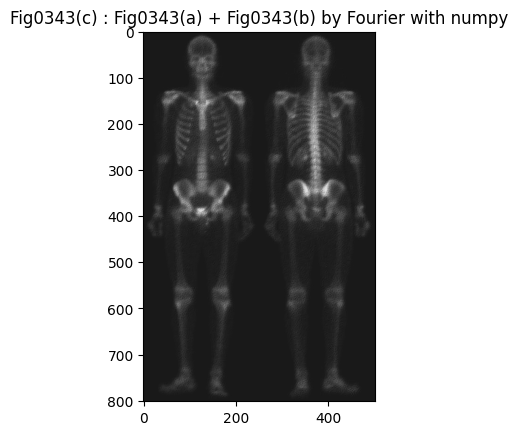

In [51]:
plt.figure()
plt.title("Fig0343(c) : Fig0343(a) + Fig0343(b) by Fourier with numpy")
plt.imshow(fig_03_43_c_np, cmap='gray')
plt.show()